In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

In [169]:
data_dict= load_iris()

In [170]:
data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [171]:
data_dict["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [172]:
df= pd.DataFrame(data_dict["data"], columns= data_dict["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


C:\Users\milto\AppData\Local\Temp\ipykernel_16256\3397463725.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


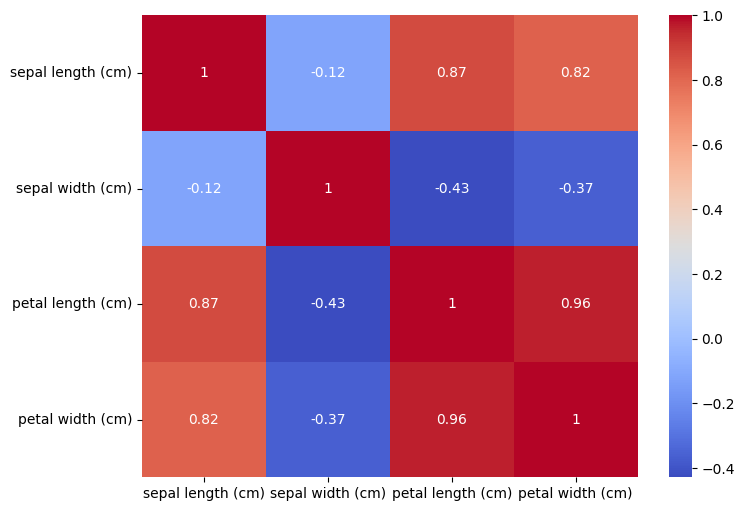

In [173]:
fig= plt.figure(figsize= [8, 6])

df_corr= df.corr()
sns.heatmap(df_corr, annot=True, cmap="coolwarm")

fig.show()
df_corr

C:\Users\milto\AppData\Local\Temp\ipykernel_16256\1267799017.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


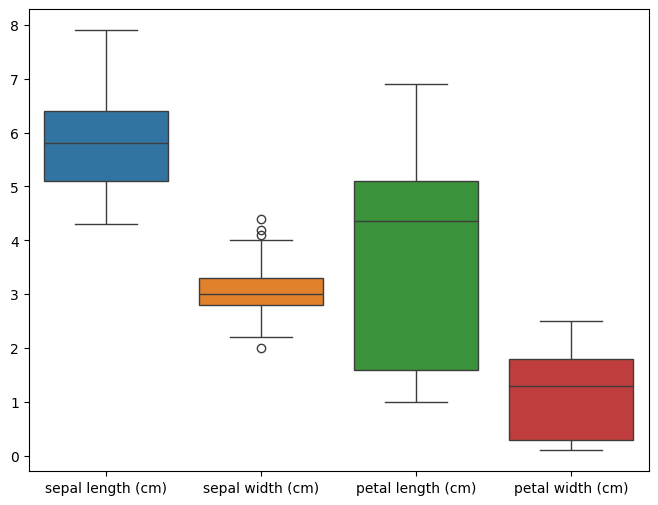

In [174]:
fig= plt.figure(figsize= [8, 6])
sns.boxplot(df)

fig.show()

In [175]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [176]:
for col in df.columns:
    q1= df[col].quantile(.25)
    q3= df[col].quantile(.75)
    iqr= q3 - q1
    
    lower= q1 - 1.5 * iqr
    higher= q3 + 1.5 * iqr
    
    df= df[(df[col] >= lower) & (df[col] <= higher)]


df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [177]:
X= df
remaning_index= df.index
remaning_index
y= data_dict["target"][remaning_index]

In [178]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [179]:
y.shape

(146,)

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [181]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(2.998746726307124e-16,
 0.9999999999999998,
 -0.026200181679167715,
 0.9999349444958894)

In [182]:
from sklearn.linear_model import LogisticRegression

model_LR= LogisticRegression(penalty=None)

model_LR.fit(scaled_X_train, y_train)

model_LR.intercept_, model_LR.coef_

(array([-2.53649742,  7.9554134 , -5.41891598]),
 array([[-3.8037175 ,  3.96884509, -7.59732281, -6.8800107 ],
        [ 2.99581147, -1.06640654, -2.960846  , -0.74602156],
        [ 0.80790603, -2.90243855, 10.55816881,  7.62603225]]))

In [184]:
scaled_X_test

array([[-0.6638371 ,  1.63897596, -1.38834737, -1.43180981],
       [-0.08684607, -0.78450983,  0.71586661,  0.92924457],
       [-0.7792353 ,  0.91193022, -1.44679776, -1.43180981],
       [-0.54843889,  0.91193022, -1.27144659, -1.43180981],
       [-1.24082812, -0.0574641 , -1.44679776, -1.29292426],
       [ 0.95173778,  0.66958164,  1.06656894,  1.20701567],
       [-1.24082812,  0.18488448, -1.32989698, -1.43180981],
       [-0.54843889, -0.0574641 ,  0.36516428,  0.37370236],
       [ 0.02855213,  0.42723306,  0.54051545,  0.79035902],
       [-0.89463351,  1.88132454, -1.38834737, -1.29292426],
       [-1.24082812, -0.0574641 , -1.44679776, -1.57069536],
       [ 0.14395034, -1.99625273,  0.65741622,  0.37370236],
       [ 0.95173778, -0.0574641 ,  0.774317  ,  1.48478678],
       [-0.08684607, -0.78450983,  0.01446195, -0.04295429],
       [ 1.18253419,  0.18488448,  0.71586661,  1.48478678],
       [-0.89463351,  0.91193022, -1.38834737, -1.43180981],
       [-0.31764248, -0.

In [185]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred= model_LR.predict(scaled_X_test)

MAE= mean_absolute_error(y_pred, y_test)
MSE= mean_squared_error(y_pred, y_test)
RMSE= np.sqrt(mean_squared_error(y_pred, y_test))

print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")
y_pred

MAE: 0.0
MSE: 0.0
RMSE: 0.0


array([0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 2])

In [186]:
y_test

array([0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 2])